# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

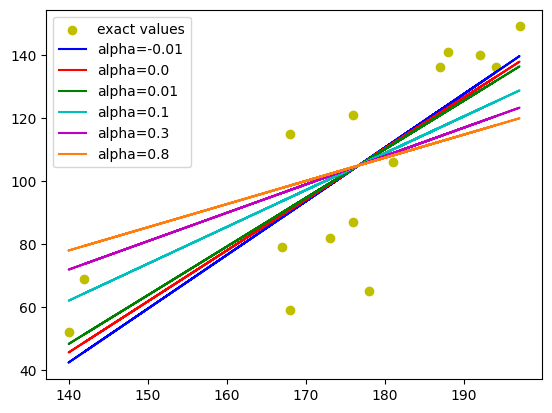

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
x_copy = x

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [-0.01, 0.0, 0.01, 0.1, 0.3, 0.8]

results = []
for alpha in alphas:
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    w=w.ravel()
    results.append(x*w.T)

plt.scatter(x_copy, y,color='y', label="exact values")

colors = ['b', 'r', 'g', 'c', 'm', 'C1']
for i, (result, color) in enumerate(zip(results, colors)):
  plt.plot(x_copy, result,color=color, label=f"alpha={alphas[i]}")

plt.legend()
plt.show()

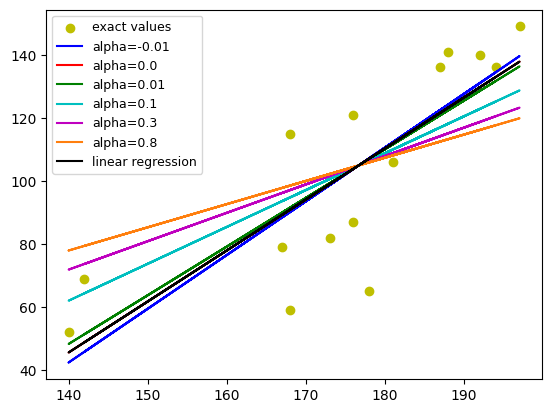

In [167]:
# with comparison to sklearn LinearRegression
from sklearn import linear_model
import numpy as np

regr = linear_model.LinearRegression()
regr.fit(x_copy, y)

plt.scatter(x_copy, y,color='y', label="exact values")

colors = ['b', 'r', 'g', 'c', 'm', 'C1']
for i, (result, color) in enumerate(zip(results, colors)):
  plt.plot(x_copy, result,color=color, label=f"alpha={alphas[i]}")

plt.plot(x_copy, regr.predict(x_copy),color='k', label="linear regression")
plt.legend(fontsize=9)
plt.show()

### **same but with mse**

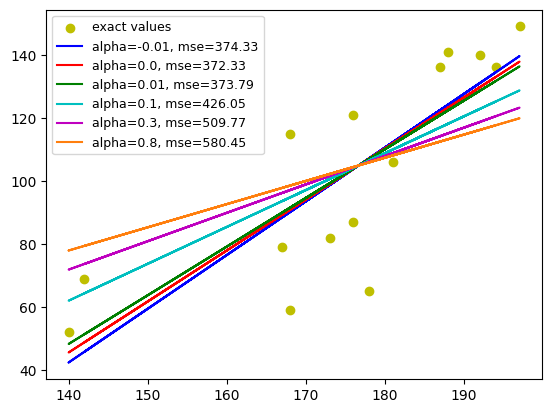

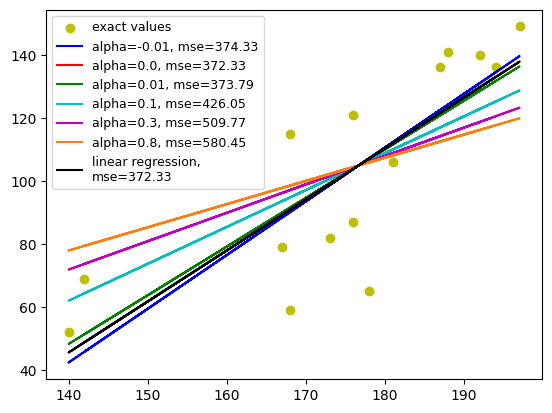

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
x_copy = x

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [-0.01, 0.0, 0.01, 0.1, 0.3, 0.8]

results = []
for alpha in alphas:
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    w=w.ravel()
    y_hat = x*w.T
    mse = f"{(1/len(y) * ((y-np.array(y_hat))**2).sum()):.2f}"
    results.append((y_hat, mse))

plt.scatter(x_copy, y,color='y', label="exact values")

colors = ['b', 'r', 'g', 'c', 'm', 'C1']
for i, (result, color) in enumerate(zip(results, colors)):
  plt.plot(x_copy, np.array(result[0]),color=color, label=f"alpha={alphas[i]}, mse={np.array(result[1])}")

plt.legend(fontsize=9)
plt.show()

# with comparison to sklearn LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

regr = linear_model.LinearRegression()
regr.fit(x_copy, y)

plt.scatter(x_copy, y,color='y', label="exact values")

colors = ['b', 'r', 'g', 'c', 'm', 'C1']
for i, (result, color) in enumerate(zip(results, colors)):
  plt.plot(x_copy, np.array(result[0]),color=color, label=f"alpha={alphas[i]}, mse={np.array(result[1])}")

y_pred = regr.predict(x_copy)
plt.plot(x_copy, y_pred,color='k', label=f"linear regression,\nmse={mean_squared_error(y, y_pred):.2f}")
plt.legend(fontsize=9)
plt.show()

## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results.

In [184]:
def sgd(x, y, alpha, r=0.001, epochs=10):
  #x_scaled = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
  x_scaled = x.copy()
  x_scaled[:, 1] = (x_scaled[:, 1] - np.mean(x_scaled[:, 1])) / np.std(x_scaled[:, 1])

  I = np.identity(2)
  w = np.linalg.inv(x_scaled.T*x_scaled + alpha * I)*x_scaled.T*y
  w=w.ravel()

  train_indices = np.random.choice(len(y), size=len(y)//2, replace=False)
  x_ = x_scaled[train_indices]
  y_ = y[train_indices]

  n = len(y_)
  for _ in range(epochs):
    y_pred = x_*w.T
    y_error = (y_ - y_pred)
    gradient = (-2 * x_.T * y_error).T + alpha * np.sign(w)
    w = w - r * gradient

  return w, x_scaled*w.T

In [193]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
x_copy = x

x = np.asmatrix(np.c_[np.ones((15,1)),x])

alpha = 0.1

w, y_pred = sgd(x, y, alpha)
w=w.ravel()

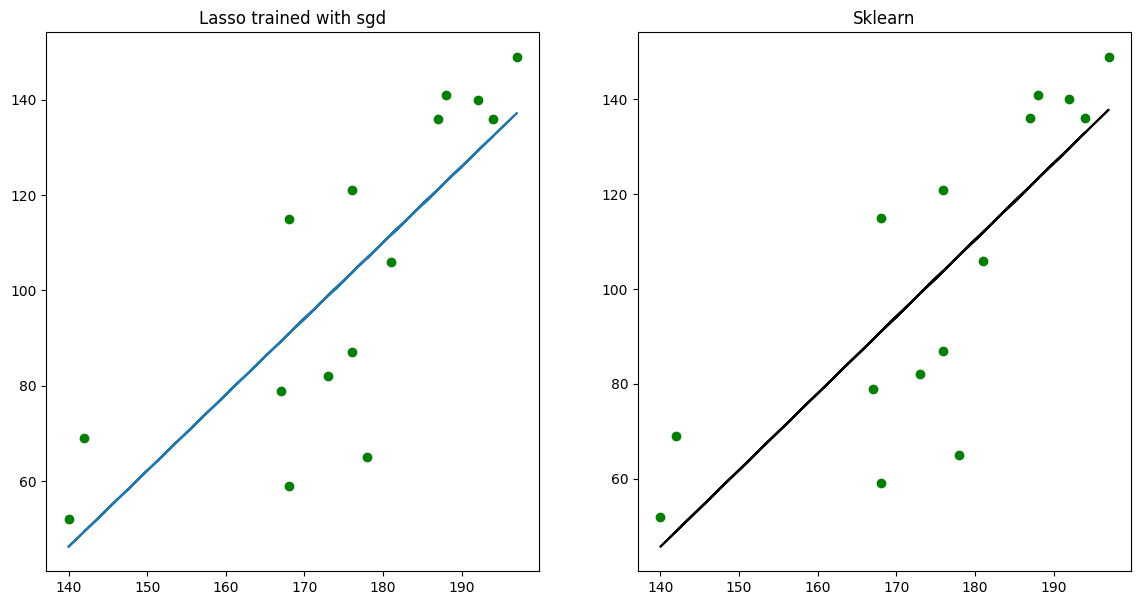

In [194]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(x_copy, y, color='g')
plt.plot(x_copy, y_pred)
plt.title("Lasso trained with sgd")

# compare to the Lasso regression
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=alpha)
lasso_regression.fit(X=x_copy, y=y)

plt.subplot(1, 2, 2)
plt.scatter(x_copy, y, color='g')
plt.plot(x_copy, lasso_regression.predict(x_copy),color='k')
plt.title("Sklearn")

plt.show()

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df[['sepal width (cm)', 'sepal length (cm)']].values
y = iris_data['target']

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = 0; SS_xx = 0
for feature in range(x.shape[1]):
  mean_xi = x[:,feature].mean()
  SS_xy += np.sum(y * x[:,feature]) - dataset_size * mean_y * mean_xi
  SS_xx += np.sum(x[:,feature] * x[:,feature]) - dataset_size * mean_xi * mean_xi

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b